<a href="https://colab.research.google.com/github/Mreeb/YOLO-V8-CLASSIFICATION-ON_Dermnet/blob/master/EDA_Analysis_Roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="C4pHQj9DsJmYjHwOLRr3")
project = rf.workspace("care-pftlv").project("skin-disease-classification-6o4dw")
dataset = project.version(5).download("folder")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin-Disease-Classification-5 in folder:: 100%|██████████| 11858/11858 [00:04<00:00, 2403.90it/s]


In [2]:
import os

def count_images_in_folder(folder_path):
    if not os.path.isdir(folder_path):
        print(f"{folder_path} is not a valid directory.")
        return

    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
    image_count = sum([len(files) for _, _, files in os.walk(folder_path) if any(file.lower().endswith(tuple(image_extensions)) for file in files)])

    print(f"Number of images in {folder_path}: {image_count}")

main_folder_path = '/content/Skin-Disease-Classification-5'

count_images_in_folder(os.path.join(main_folder_path, 'train'))
count_images_in_folder(os.path.join(main_folder_path, 'test'))
count_images_in_folder(os.path.join(main_folder_path, 'valid'))


Number of images in /content/Skin-Disease-Classification-5/train: 10854
Number of images in /content/Skin-Disease-Classification-5/test: 212
Number of images in /content/Skin-Disease-Classification-5/valid: 769


In [8]:
import os

def list_class_folders(folder_path):
    if not os.path.isdir(folder_path):
        print(f"{folder_path} is not a valid directory.")
        return

    class_folders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    print(f": {class_folders}")

main_folder_path = '/content/Skin-Disease-Classification-5'

list_class_folders(os.path.join(main_folder_path, 'train'))


: ['Basal-cell-carcinoma', 'Nail Onychopathies', 'Melanoma', 'Unlabeled', 'Fissured-Skin', 'Acne']


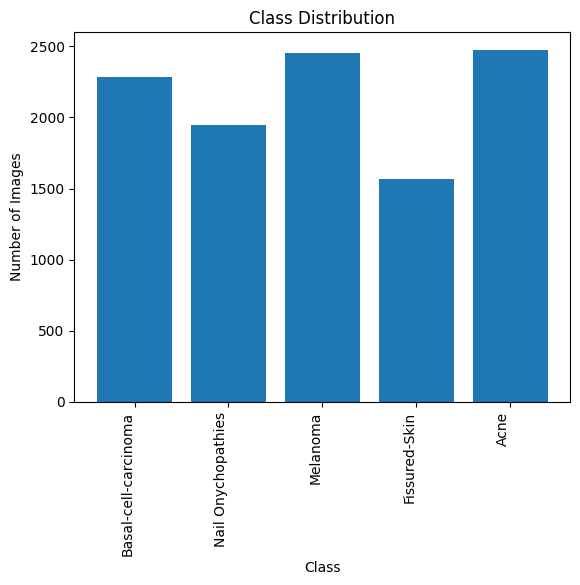

In [11]:
import os
import matplotlib.pyplot as plt

def list_class_folders(folder_path):
    if not os.path.isdir(folder_path):
        print(f"{folder_path} is not a valid directory.")
        return

    class_folders = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
    return class_folders

def plot_class_distribution(folder_path, exclude_class='Unlabeled'):
    class_folders = list_class_folders(folder_path)

    if not class_folders:
        return

    class_folders = [c for c in class_folders if c != exclude_class]

    class_counts = {class_folder: len(os.listdir(os.path.join(folder_path, class_folder))) for class_folder in class_folders}

    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=90, ha='right')
    plt.show()

main_folder_path = '/content/Skin-Disease-Classification-5'

list_class_folders(os.path.join(main_folder_path, 'train'))
plot_class_distribution(os.path.join(main_folder_path, 'train'), exclude_class='Unlabeled')
